In [1]:
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.animation as anim
import matplotlib as mpl
import cartopy
import numpy as np
from IPython.display import HTML
import datetime
%matplotlib inline
mpl.rcParams['animation.embed_limit'] = 2**128
mpl.rc('font', size=16) 

In [2]:
data = xarray.open_mfdataset("data_eu_last_month.nc")
a=np.array([data['longitude'][data['longitude']>300]-360])
b=np.array([data['longitude'][data['longitude']<300]])
data['longitude']=np.concatenate((a, b), axis=None)
data.ecff_conc.attrs["standard_name"]="conzentration"
print(data)

<xarray.Dataset>
Dimensions:    (latitude: 420, level: 1, longitude: 700, time: 768)
Coordinates:
  * longitude  (longitude) float32 -24.950012 -24.850006 -24.75 ... 44.85 44.95
  * latitude   (latitude) float32 71.95 71.85 71.75 71.65 ... 30.25 30.15 30.05
  * level      (level) float32 0.0
  * time       (time) timedelta64[ns] 00:00:00 01:00:00 ... 31 days 23:00:00
Data variables:
    ecff_conc  (time, level, latitude, longitude) float32 dask.array<chunksize=(768, 1, 420, 700), meta=np.ndarray>
Attributes:
    title:        ECFF Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20201021-20201121+[0H_23H]
    summary:      ENSEMBLE model hourly ANALYSIS of ECFF concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)


In [3]:
variable = data.ecff_conc
variable

<xarray.DataArray 'ecff_conc' (time: 768, level: 1, latitude: 420, longitude: 700)>
dask.array<open_dataset-4e596fce446ed7ec2eaef825d6c85361ecff_conc, shape=(768, 1, 420, 700), dtype=float32, chunksize=(768, 1, 420, 700), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -24.950012 -24.850006 -24.75 ... 44.85 44.95
  * latitude   (latitude) float32 71.95 71.85 71.75 71.65 ... 30.25 30.15 30.05
  * level      (level) float32 0.0
  * time       (time) timedelta64[ns] 00:00:00 01:00:00 ... 31 days 23:00:00
Attributes:
    species:        PM2.5 Elemental Carbon from Anthropogenic Fossil Fuels
    units:          µg/m3
    value:          hourly values
    standard_name:  conzentration

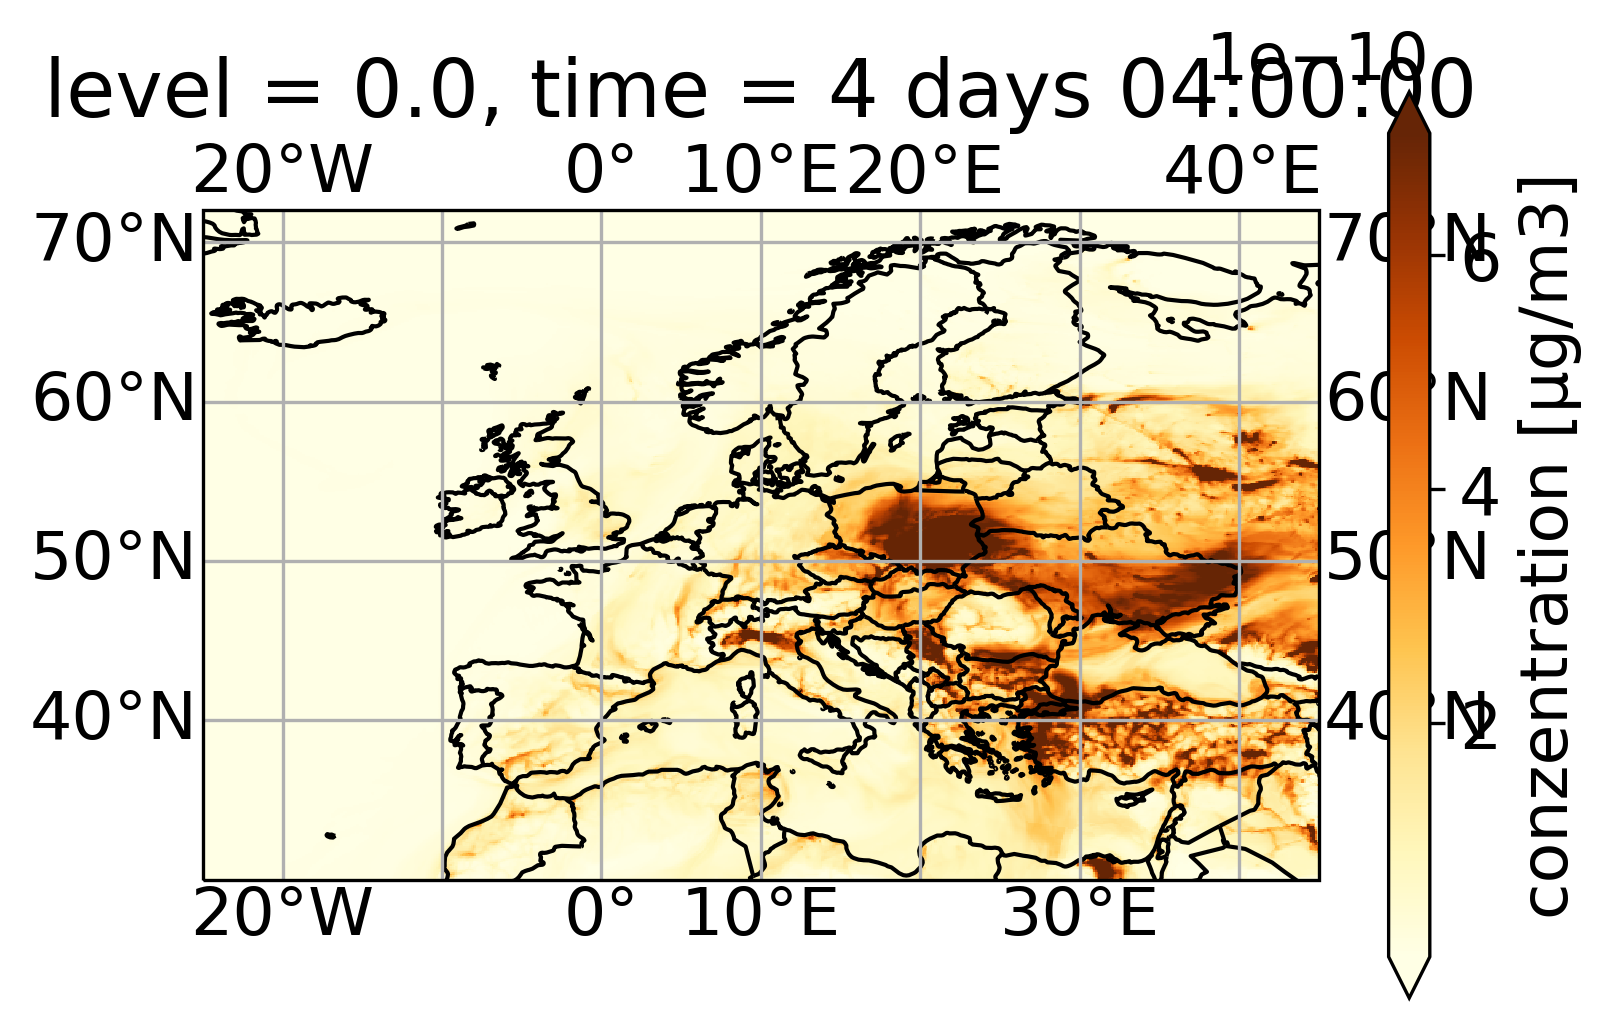

In [36]:
fig = plt.figure(dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
image = variable.isel(time = 100,level=0).plot.imshow(ax=ax,cmap='YlOrBr',add_labels=True, transform=ccrs.PlateCarree(), animated=True,robust=True)
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')

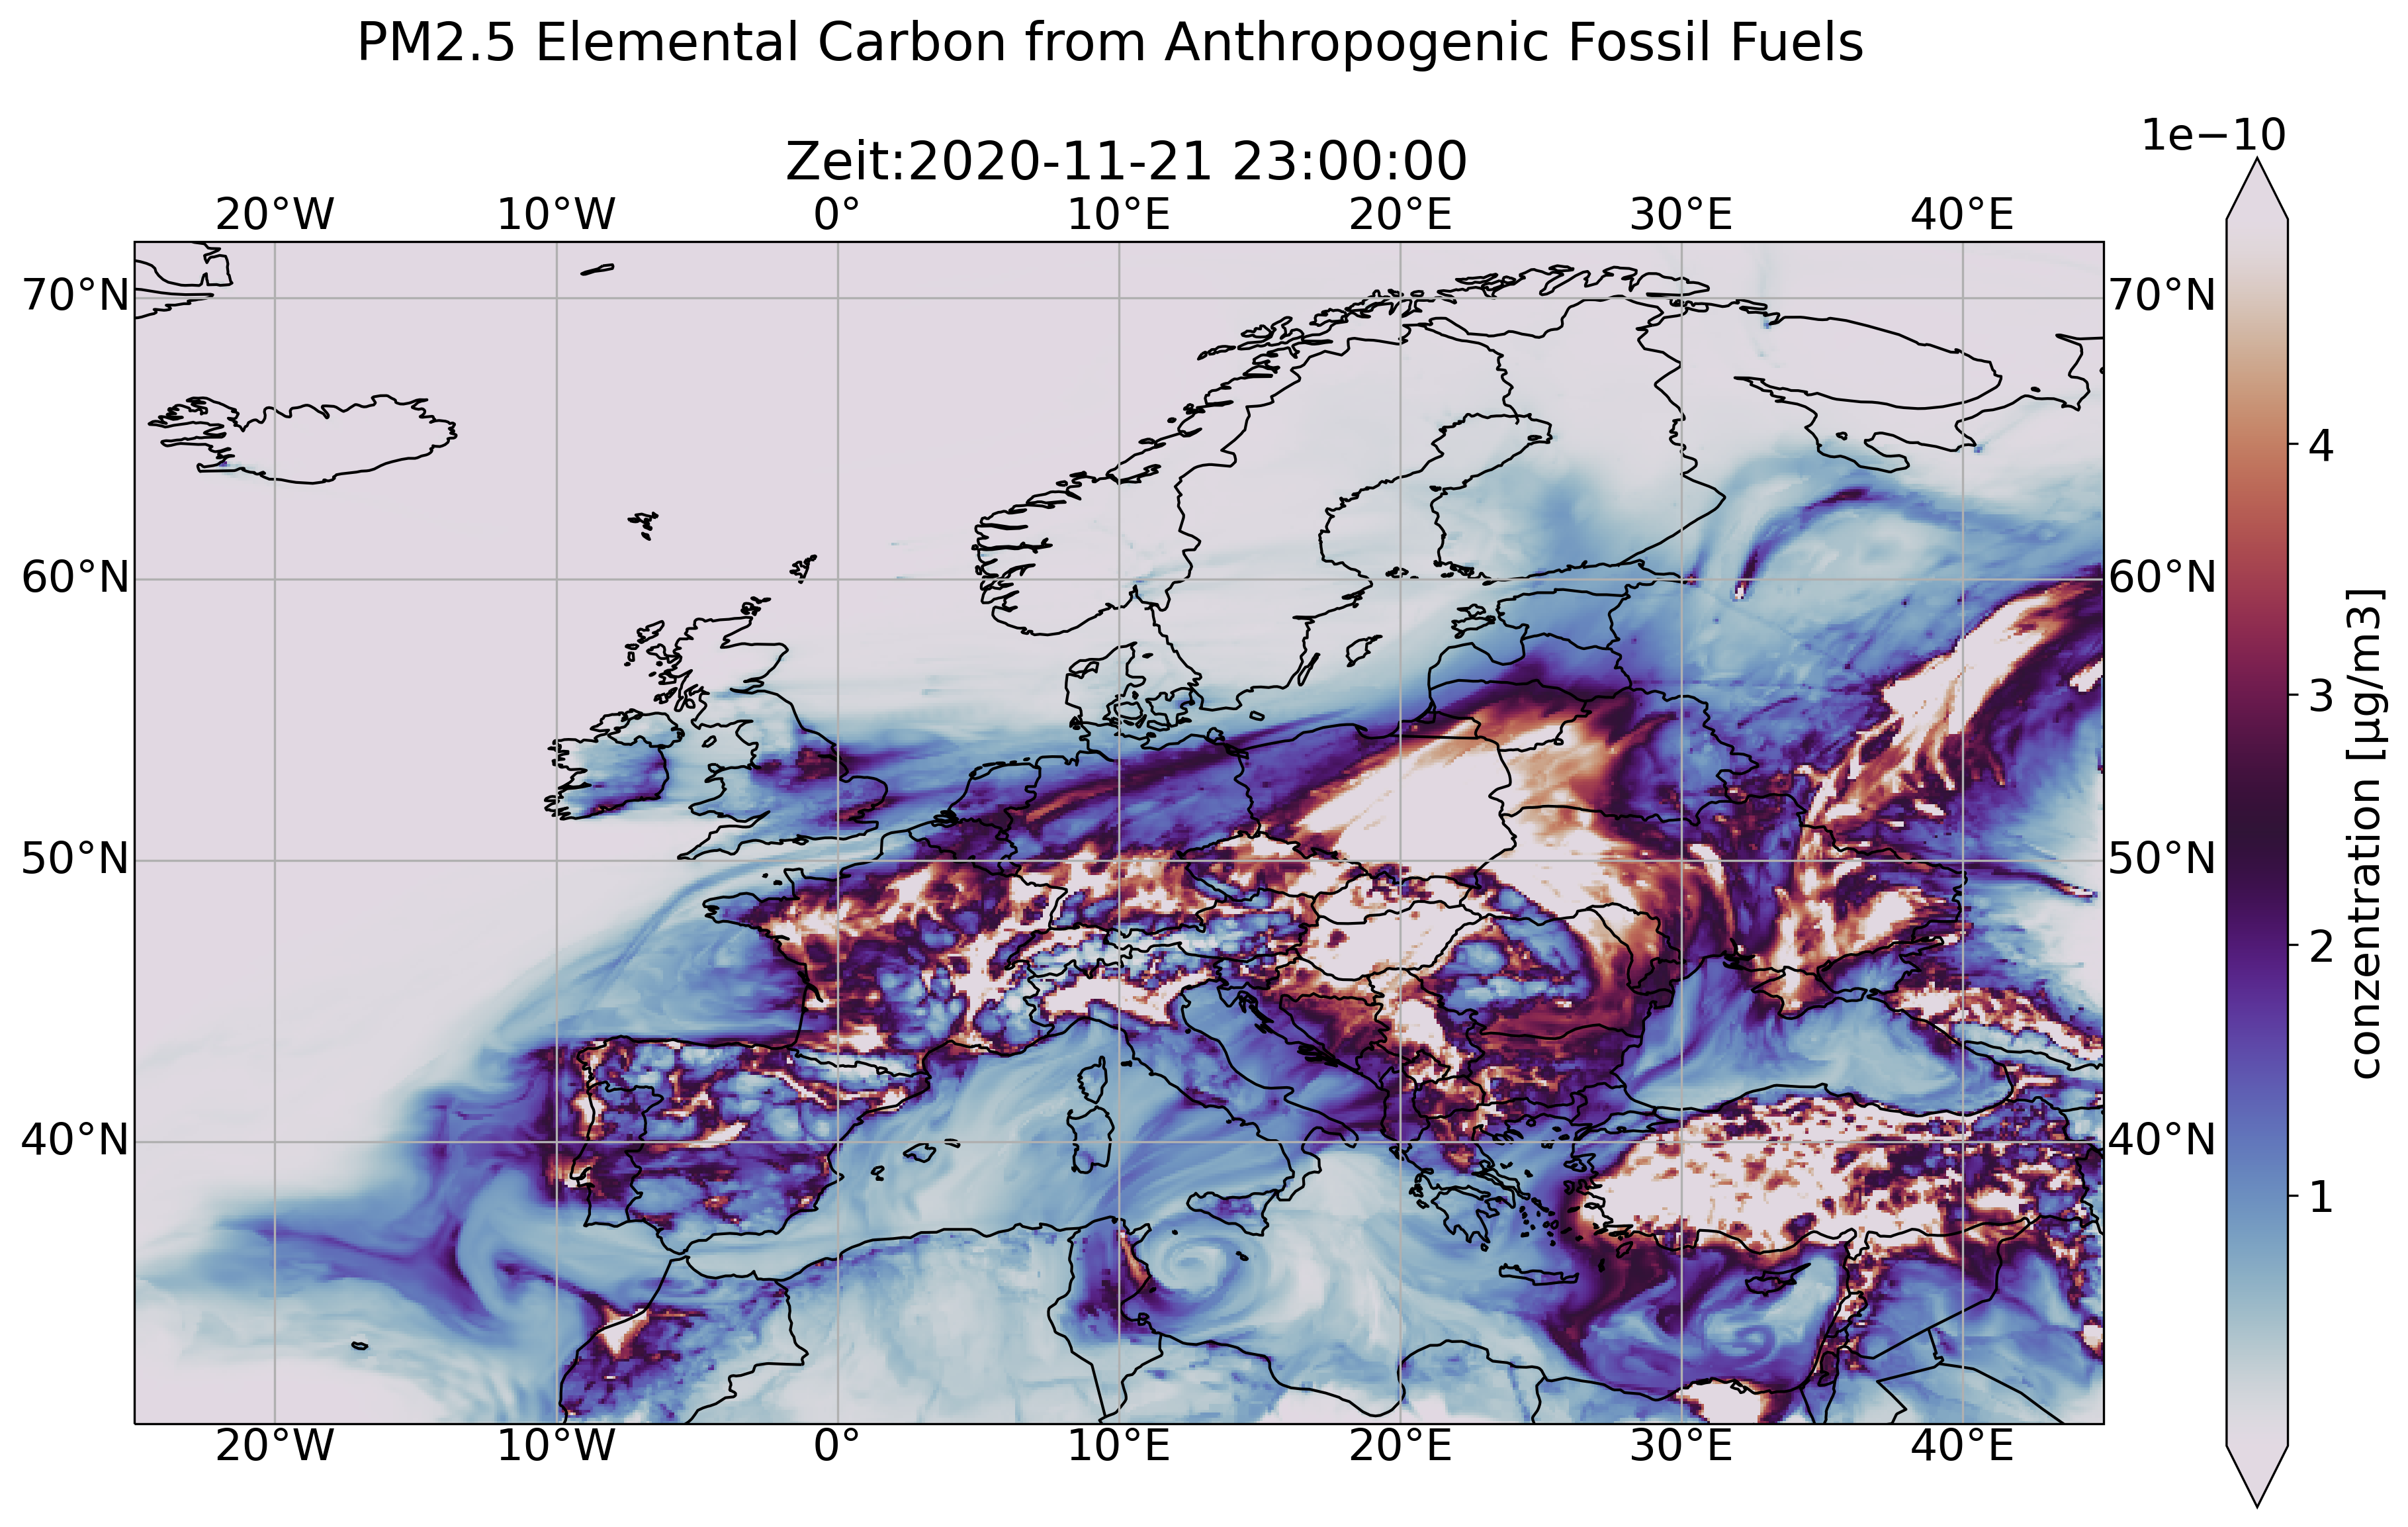

In [41]:

fig = plt.figure(dpi=300,figsize=(16,9))
ax = plt.axes(projection=ccrs.PlateCarree())
image = variable.isel(time = 0,level=0).plot.imshow(ax=ax,cmap='twilight', transform=ccrs.PlateCarree(), animated=True,robust=True)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

def update(t):
    # Update the plot for a specific time
    print((t/variable.time.values[1])/length*100,end="\r")
    title=str(datetime.datetime(2020,10,21)+datetime.timedelta(microseconds=int(t/1000)))
    ax.set_title(f"PM2.5 Elemental Carbon from Anthropogenic Fossil Fuels \n \n Zeit:{title}")
    image.set_array(variable.sel(time=t,level=0))
    return image,
length=len(data['time'])
animation = anim.FuncAnimation(fig, update , frames=variable.time.values[0:length], blit=False)


Writer = anim.writers['ffmpeg']
writer = Writer(fps=24, metadata=dict(artist='Moin'))
animation.save('eu_full_300dpi_16_9_tw.mp4', writer=writer)
#HTML(animation.to_html5_video())

In [5]:
import time as tm

start_time = tm.time()

Writer = anim.writers['ffmpeg']
writer = Writer(fps=24, metadata=dict(artist='Moin'))
animation.save('eu24_1.mp4', writer=writer)

print("--- %s seconds ---" % (tm.time() - start_time))


KeyboardInterrupt: 